# Introduction to Pandas

## Highlight
In this module, you will learn how to:
* load csv data file
* perform data selection (similar to what we did in numpy using slicing)
* join tables, like SQL as in the database class
* perform simple data analysis by computing statistic in a data frame
* Use https://pandas.pydata.org/pandas-docs/stable/reference/index.html for API reference

In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# create df from lists
col1 = [1,2,3,4,5]
col2 = ['Mon','Tues','Wed','Thurs','Fri']
df = pd.DataFrame(zip(col1,col2),columns = ['Num','Day'])
df

,Num,Day
0,1,Mon
1,2,Tues
2,3,Wed
3,4,Thurs
4,5,Fri


In [4]:
# create df from lists
lst = [['tom', 'reacher', 25], ['krish', 'pete', 30], 
       ['nick', 'wilson', 26], ['juli', 'williams', 22]] 
    
df = pd.DataFrame(lst, columns =['FName', 'LName', 'Age'], dtype = float) 
df 

,FName,LName,Age
0,tom,reacher,25.0
1,krish,pete,30.0
2,nick,wilson,26.0
3,juli,williams,22.0


In [5]:
# create df from numpy
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                 columns=['A', 'B', 'C', 'D'])
print (df.head())

   A  B   C   D
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [6]:
# create df from dictionary
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/jennybc/gapminder/master/inst/extdata/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [9]:
# obtain a numpy 2d array from data frame in pandas
df_np = df.to_numpy() 
print (df_np)
# this also works
print (df.values)

[['Afghanistan' 'Asia' 1952 28.801 8425333 779.4453145]
 ['Afghanistan' 'Asia' 1957 30.332 9240934 820.8530296]
 ['Afghanistan' 'Asia' 1962 31.997 10267083 853.10071]
 ...
 ['Zimbabwe' 'Africa' 1997 46.809 11404948 792.4499603]
 ['Zimbabwe' 'Africa' 2002 39.989 11926563 672.0386227]
 ['Zimbabwe' 'Africa' 2007 43.487 12311143 469.7092981]]
[['Afghanistan' 'Asia' 1952 28.801 8425333 779.4453145]
 ['Afghanistan' 'Asia' 1957 30.332 9240934 820.8530296]
 ['Afghanistan' 'Asia' 1962 31.997 10267083 853.10071]
 ...
 ['Zimbabwe' 'Africa' 1997 46.809 11404948 792.4499603]
 ['Zimbabwe' 'Africa' 2002 39.989 11926563 672.0386227]
 ['Zimbabwe' 'Africa' 2007 43.487 12311143 469.7092981]]


In [10]:
# perform slicing in numpy (beware of casting types correctly)
df_sliced = df_np[:, 2:4].astype('float64')
df_sliced

array([[1952.   ,   28.801],
       [1957.   ,   30.332],
       [1962.   ,   31.997],
       ...,
       [1997.   ,   46.809],
       [2002.   ,   39.989],
       [2007.   ,   43.487]])

# Data Selection

In [11]:
df['country'] # returns a series that has a 'country' column, 1D data

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [12]:
df[['country']] # returns a dataframe, 2D data

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [13]:
# df.iloc[row_idx, col_idx]
# Take all rows, and pick the 4th column
df.iloc[:, 3]

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: lifeExp, Length: 1704, dtype: float64

In [14]:
# Take all rows, and pick the 'lifeExp', 'year' columns
df.loc[:, ['lifeExp', 'year']]

,lifeExp,year
0,28.801,1952
1,30.332,1957
2,31.997,1962
3,34.020,1967
4,36.088,1972
...,...,...
1699,62.351,1987
1700,60.377,1992
1701,46.809,1997
1702,39.989,2002


In [15]:
filter1 = df['year'] > 2000
filter2 = df['lifeExp'] < 40

In [16]:
df[filter1 & filter2]['country']

1463    Swaziland
1690       Zambia
1702     Zimbabwe
Name: country, dtype: object

# Exercise 1: See slide 14

In [17]:
import pandas as pd
import numpy as np
url = "http://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Auto.csv"
cars = pd.read_csv(url, index_col=0)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
# check the shape of the data: # of rows and columns
print(cars.shape) # return: number of rows, number of columns
print(cars.shape[0]) # return: number of rows
print(len(cars)) # return: number of rows

(392, 9)
392
392


### 1. Select engine related 3 columns (“cylinders”, “displacement”, “horsepower”) from the dataset.

In [19]:
# select all rows and particular feature columns


### 2. Select every 4th row

In [20]:
# Remember that the first row starts from label 4


In [21]:
# slice using labels


In [22]:
# slice using indexes


### 3. Select rows with mpg > 30

### 4. Display the number of cars that have at least 30 MPG and at least 5 cylinders.

# Adding, changing and deleting data (From slide 16)

In [23]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [24]:
# update a particular row value
cars.loc[321] = [40,4,119,92,2434,15,80,3,'tesla']

In [25]:
# change all cars's mpg that is below 20 to 0
cars.loc[cars['mpg']<20, 'mpg'] = 0

In [26]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,0.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,0.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,0.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,0.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,0.0,8,302.0,140,3449,10.5,70,1,ford torino


In [27]:
# row number can be anything, as long as row size matches
cars.loc[9999] = [40,4,119,92,2434,15,80,3,'model3']

In [28]:
cars.loc[9999]

mpg               40.0
cylinders            4
displacement     119.0
horsepower          92
weight            2434
acceleration      15.0
year                80
origin               3
name            model3
Name: 9999, dtype: object

In [29]:
len(cars) # added one more car

393

In [30]:
cars.append([[40,4,119,92,2434,15,80,3,'model3']]) # not working

,0,1,2,3,4,5,6,7,8,acceleration,cylinders,displacement,horsepower,mpg,name,origin,weight,year
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,8.0,307.0,130.0,0.0,chevrolet chevelle malibu,1.0,3504.0,70.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5,8.0,350.0,165.0,0.0,buick skylark 320,1.0,3693.0,70.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,8.0,318.0,150.0,0.0,plymouth satellite,1.0,3436.0,70.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,8.0,304.0,150.0,0.0,amc rebel sst,1.0,3433.0,70.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5,8.0,302.0,140.0,0.0,ford torino,1.0,3449.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.6,4.0,135.0,84.0,32.0,dodge rampage,1.0,2295.0,82.0
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,4.0,120.0,79.0,28.0,ford ranger,1.0,2625.0,82.0
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.4,4.0,119.0,82.0,31.0,chevy s-10,1.0,2720.0,82.0
9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,4.0,119.0,92.0,40.0,model3,3.0,2434.0,80.0


In [31]:
# append two dataframes
print (cars.columns)
df = pd.DataFrame([[40,4,119,92,2434,15,80,3,'model3']], columns=cars.columns)
df

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,40,4,119,92,2434,15,80,3,model3


In [32]:
# returns a new df, combining cars and df
cars.append(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,0.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,0.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,0.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,0.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,0.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10
9999,40.0,4,119.0,92,2434,15.0,80,3,model3


In [33]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,0.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,0.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,0.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,0.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,0.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
len(cars)

393

In [35]:
# create a new pd series with zeros
zero_col = pd.Series(0, index=cars.index)
print(zero_col)

1       0
2       0
3       0
4       0
5       0
       ..
394     0
395     0
396     0
397     0
9999    0
Length: 393, dtype: int64


In [36]:
# set the mpg column to zeros
cars['mpg'] = zero_col
cars[['mpg', 'name']].head()

,mpg,name
1,0,chevrolet chevelle malibu
2,0,buick skylark 320
3,0,plymouth satellite
4,0,amc rebel sst
5,0,ford torino


In [37]:
cars.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             389,  390,  391,  392,  393,  394,  395,  396,  397, 9999],
           dtype='int64', length=393)

In [38]:
# remove the row with index=1
cars.drop([1], axis=0, inplace=True)

In [39]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
2,0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,0,8,302.0,140,3449,10.5,70,1,ford torino
6,0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [40]:
# drop columns (axis=1) year and weight, modify the table inplace
cars.drop(['year', 'weight'], axis=1, inplace=True)

In [41]:
cars.head()

,mpg,cylinders,displacement,horsepower,acceleration,origin,name
2,0,8,350.0,165,11.5,1,buick skylark 320
3,0,8,318.0,150,11.0,1,plymouth satellite
4,0,8,304.0,150,12.0,1,amc rebel sst
5,0,8,302.0,140,10.5,1,ford torino
6,0,8,429.0,198,10.0,1,ford galaxie 500


# Concatenate, Join and Merge (Slide 20)

In [42]:
# https://realpython.com/pandas-merge-join-and-concat/#pandas-merge-combining-data-on-common-columns-or-indices

In [43]:
# let's create some data frames: df1 and df4
df1 = pd.DataFrame(np.arange(16).reshape(4, 4),
                  columns=['A', 'B', 'C', 'D'])
df4 = pd.DataFrame(np.arange(12).reshape(4, 3), index=[2,3,6,7],
                  columns=['B', 'D', 'F'])

## pd.concat: concatenate two tables (by rows or by columns)

In [44]:
df1

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [45]:
df4

,B,D,F
2,0,1,2
3,3,4,5
6,6,7,8
7,9,10,11


In [46]:
# concat two tables by columns (axis=1) 
# In this example, only indices 2,3 exist in df1 and df4
# outer: all the unmatched rows will still be in the output
result = pd.concat([df1, df4], axis=1, join='outer')
print(result)

      A     B     C     D    B     D     F
0   0.0   1.0   2.0   3.0  NaN   NaN   NaN
1   4.0   5.0   6.0   7.0  NaN   NaN   NaN
2   8.0   9.0  10.0  11.0  0.0   1.0   2.0
3  12.0  13.0  14.0  15.0  3.0   4.0   5.0
6   NaN   NaN   NaN   NaN  6.0   7.0   8.0
7   NaN   NaN   NaN   NaN  9.0  10.0  11.0


In [47]:
# inner: only the rows with matched indices will be in the output
result = pd.concat([df1, df4], axis=1, join='inner')
print(result)

    A   B   C   D  B  D  F
2   8   9  10  11  0  1  2
3  12  13  14  15  3  4  5


## pd.merge: Perform a SQL-style join over keys on two tables

In [48]:
K0, K1, K2, A0, A1, A2, A3, B0, B1, B2, B3 = range(11)
C0, C1, C2, C3, D0, D1, D2, D3 = range(8)
# make two tables:
left = pd.DataFrame(np.array([K0, K0, A0, B0, K0, K1, A1, B1, K1, K0, A2, B2, K2, K1, A3, B3]).reshape(4, 4),
                  columns=['key1', 'key2', 'A', 'B'], dtype=np.int32)
right = pd.DataFrame(np.array([K0, K0, C0, D0, K1, K0, C1, D1, K1, K0, C2, D2, K2, K0, C3, D3]).reshape(4, 4),
                  columns=['key1', 'key2', 'C', 'D'], dtype=np.int32)
print(left)
print(right)

   key1  key2  A   B
0     0     0  3   7
1     0     1  4   8
2     1     0  5   9
3     2     1  6  10
   key1  key2  C  D
0     0     0  0  4
1     1     0  1  5
2     1     0  2  6
3     2     0  3  7


In [49]:
?pd.merge

In [50]:
# let's join them by columns key1 and key2
# left-join: join two tables, and all rows in the left table must be in the output
# unmatched rows on the left table are filled with NaN columns
result = pd.merge(left, right, how='left', on=['key1','key2'])
print(result)

   key1  key2  A   B    C    D
0     0     0  3   7  0.0  4.0
1     0     1  4   8  NaN  NaN
2     1     0  5   9  1.0  5.0
3     1     0  5   9  2.0  6.0
4     2     1  6  10  NaN  NaN


In [51]:
# same results
result1 = left.merge(right, how='left', on=['key1', 'key2'])
result1

,key1,key2,A,B,C,D
0,0,0,3,7,0.0,4.0
1,0,1,4,8,NaN,NaN
2,1,0,5,9,1.0,5.0
3,1,0,5,9,2.0,6.0
4,2,1,6,10,NaN,NaN


In [52]:
# join on the right (i.e. all rows on the right table must be in the output)
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,0,0,3.0,7.0,0,4
1,1,0,5.0,9.0,1,5
2,1,0,5.0,9.0,2,6
3,2,0,NaN,NaN,3,7


In [53]:
# perform an outer join: keep all rows, including the unmatched ones in tables left and right, in the output 
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,0,0,3.0,7.0,0.0,4.0
1,0,1,4.0,8.0,NaN,NaN
2,1,0,5.0,9.0,1.0,5.0
3,1,0,5.0,9.0,2.0,6.0
4,2,1,6.0,10.0,NaN,NaN
5,2,0,NaN,NaN,3.0,7.0


In [54]:
# perform an innner join
pd.merge(left, right, how='inner', on=['key1','key2'])

,key1,key2,A,B,C,D
0,0,0,3,7,0,4
1,1,0,5,9,1,5
2,1,0,5,9,2,6


In [55]:
# pd.DataFrame.join() SQL style merge
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})

other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})

print (df)
print (other)

  key   A
0  K0  A0
1  K1  A1
2  K2  A2
3  K3  A3
4  K4  A4
5  K5  A5
  key   B
0  K0  B0
1  K1  B1
2  K2  B2


In [56]:
# join dataframes using indexes
df.join(other, lsuffix='_caller', rsuffix='_other',how='inner')

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2


In [57]:
df.set_index('key')

,A
key,
K0,A0
K1,A1
K2,A2
K3,A3
K4,A4
K5,A5


In [58]:
# If we want to join using the key columns, we need to set key to be the index in both df and other. 
df.set_index('key').join(other.set_index('key'),how='inner')

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [59]:
other.set_index('key')

,B
key,
K0,B0
K1,B1
K2,B2


In [60]:
# Another option to join using the key columns is to use the on parameter. 
# DataFrame.join always uses other’s index but we can use any column in df. 
# This method preserves the original DataFrame’s index in the result.
df.join(other.set_index('key'), on='key',how='inner')

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


# Exercise time (Slide 30)

In [61]:
url2 = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSBUNup2v-KIb528YJ6Qegwu69G9JpjpLQ3JzC8hicE-nIcHlF5MjNtxEdFdcAzefJ8h0MsTG_Sp1Yx/pub?gid=1224420987&single=true&output=csv"
url3 = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSw7K-qOSFkIJJiil-ajQVYrVWL4poE4Wk3e73ZHVhJQaI-Qa_tfvS5suW0kPtjxfq6RxBNCNUxm9bT/pub?gid=1157486544&single=true&output=csv"
gdp = pd.read_csv(url2)
cpi = pd.read_csv(url3)
gdp.head()

,DATE,GDP
0,1947-01-01,243.1
1,1947-04-01,246.3
2,1947-07-01,250.1
3,1947-10-01,260.3
4,1948-01-01,266.2


In [62]:
cpi.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [63]:
# Perform an outer join on the DATE column


# pd.DataFrame.groupby()

Sometimes we want to perform data analysis per group. For example, we may want to look at the average statistics per animal group.

In [64]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.],
                   'Age': [10, 20, 30, 40]
                  })
df

,Animal,Max Speed,Age
0,Falcon,380.0,10
1,Falcon,370.0,20
2,Parrot,24.0,30
3,Parrot,26.0,40


In [65]:
# compute the average statistics per animal group
df.groupby(['Animal']).mean()

,Max Speed,Age
Animal,,
Falcon,375.0,15
Parrot,25.0,35


# Exercise time (Slide 32)

In [66]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
df = pd.read_csv(url, index_col=0)
df.head()

# Question to solve: Which continent drinks more beer on average?

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF


# pd.DataFrame.pivot_table()

A pivot table is a table of statistics that summarizes the data of a more extensive table (such as from a database, spreadsheet, or business intelligence program). This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way. (From Wikipedia)

In [67]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather2.csv'
df = pd.read_csv(url, index_col=0)  # index_col = 'date' also works (see pandas documentation) 
df

,city,temperature,humidity
date,,,
5/1/2017,new york,65,56
5/1/2017,new york,61,54
5/2/2017,new york,70,60
5/2/2017,new york,72,62
5/1/2017,mumbai,75,80
5/1/2017,mumbai,78,83
5/2/2017,mumbai,82,85
5/2/2017,mumbai,80,26


In [68]:
# let's find out the average temperature of each city on each date
df1 = pd.pivot_table(df, index='city', columns='date', values=['temperature'], aggfunc=np.mean)
df1

temperature         
date        5/1/2017 5/2/2017
city                         
mumbai          76.5     81.0
new york        63.0     71.0

In [69]:
df2 = pd.pivot_table(df, index='city', columns='date', values=['humidity'], aggfunc=np.mean)
df2

humidity         
date     5/1/2017 5/2/2017
city                      
mumbai       81.5     55.5
new york     55.0     61.0

In [70]:
# we can analyze more attributes on one pivot table
df1 = pd.pivot_table(df, index='city', columns='date', values=['temperature', 'humidity'], aggfunc=[np.mean, np.max, np.min])
df1

mean                                   amax                       \
         humidity          temperature          humidity          temperature   
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017 5/1/2017 5/2/2017    5/1/2017   
city                                                                            
mumbai       81.5     55.5        76.5     81.0       83       85          78   
new york     55.0     61.0        63.0     71.0       56       62          65   

                      amin                                
                  humidity          temperature           
date     5/2/2017 5/1/2017 5/2/2017    5/1/2017 5/2/2017  
city                                                      
mumbai         82       80       26          75       80  
new york       72       54       60          61       70

In [71]:
# compute various statistic over your data in just one command!
df.describe()

,temperature,humidity
count,8.000000,8.000000
mean,72.875000,63.250000
std,7.337526,19.572211
min,61.000000,26.000000
25%,68.750000,55.500000
50%,73.500000,61.000000
75%,78.500000,80.750000
max,82.000000,85.000000


In [72]:
# you can groupby cities and compute statistic per city
df.groupby('city').describe()

temperature                                                 humidity  \
               count   mean       std   min    25%   50%   75%   max    count   
city                                                                            
mumbai           4.0  78.75  2.986079  75.0  77.25  79.0  80.5  82.0      4.0   
new york         4.0  67.00  4.966555  61.0  64.00  67.5  70.5  72.0      4.0   

                                                         
          mean        std   min   25%   50%   75%   max  
city                                                     
mumbai    68.5  28.407745  26.0  66.5  81.5  83.5  85.0  
new york  58.0   3.651484  54.0  55.5  58.0  60.5  62.0

In [73]:
# you can group by multiple columns to obtain more detailed statistic (per city, per date)
df.groupby(['city', 'date']).describe()

temperature                                                  \
                        count  mean       std   min    25%   50%    75%   max   
city     date                                                                   
mumbai   5/1/2017         2.0  76.5  2.121320  75.0  75.75  76.5  77.25  78.0   
         5/2/2017         2.0  81.0  1.414214  80.0  80.50  81.0  81.50  82.0   
new york 5/1/2017         2.0  63.0  2.828427  61.0  62.00  63.0  64.00  65.0   
         5/2/2017         2.0  71.0  1.414214  70.0  70.50  71.0  71.50  72.0   

                  humidity                                                   
                     count  mean        std   min    25%   50%    75%   max  
city     date                                                                
mumbai   5/1/2017      2.0  81.5   2.121320  80.0  80.75  81.5  82.25  83.0  
         5/2/2017      2.0  55.5  41.719300  26.0  40.75  55.5  70.25  85.0  
new york 5/1/2017      2.0  55.0   1.414214  54.0  54.50  55.0  55.50  56.0  
         5/2/2017      2.0  61.0   1.414214  60.0  60.50  61.0  61.50  62.0

# pd.DataFrame.to_csv() : Save a dataframe to disk

In [74]:
df

,city,temperature,humidity
date,,,
5/1/2017,new york,65,56
5/1/2017,new york,61,54
5/2/2017,new york,70,60
5/2/2017,new york,72,62
5/1/2017,mumbai,75,80
5/1/2017,mumbai,78,83
5/2/2017,mumbai,82,85
5/2/2017,mumbai,80,26


In [75]:
df.to_csv('out.csv', index=True, sep='\t')

# Scatter plot

In [76]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
df.head()

,A,B,C,D
0,0.434767,-1.055648,2.607933,0.320663
1,1.141059,-1.161976,1.234458,1.056606
2,-1.181035,-0.112442,0.817075,-0.135518
3,-0.053282,0.853888,0.197606,-0.070987
4,-0.963786,-0.702706,-0.518474,-0.836297


array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

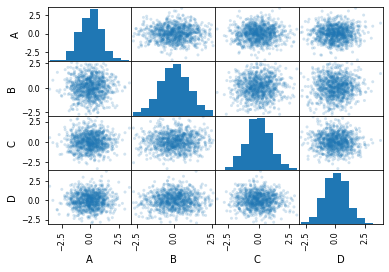

In [77]:
pd.plotting.scatter_matrix(df, alpha=0.2)

Next, we will learn and use matplotlib for plotting in Python

<AxesSubplot:xlabel='A', ylabel='B'>

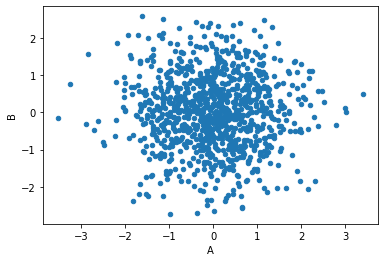

In [78]:
df.plot.scatter(x='A',y="B")